# Phenomenological Aging Model

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [104]:
def f(x, alpha_damage_propagation, disease_rate, t=None):
    return (1-x)*(alpha_damage_propagation*x + disease_rate)

In [105]:
a = 0.0
b = 100
rango_alpha = np.arange(2,21,2)
alpha_damage_propagation = 0.031
rango_damage_propagation = alpha_damage_propagation*rango_alpha
rango_alpha_adicional = np.linspace(0,1,6)*alpha_damage_propagation

rango_alphas = np.concatenate((rango_alpha_adicional,rango_damage_propagation), axis=0)

coupling_factor = 0.089
rango_beta = np.arange(2,21,2)
rango_coupling = rango_beta*coupling_factor
rango_beta_adicional = np.linspace(0,1,6)*coupling_factor
rango_betas = np.concatenate((rango_beta_adicional,rango_coupling), axis=0)

mortality_rate = 4.3*(10**(-5))
disease_rate = 0.05


N = 100

x_points = []
temporal_points = []
gompertz_data = []

General_gompertz_law = {}
for alpha in rango_alphas:
    x = 0.0
    h = (b-a)/N
    temporal_individuals_points = np.arange(a,b,h)
    x_individual_points = []
    for t in temporal_individuals_points:
        x_individual_points.append(x)
        k1 = h*f(x, alpha, disease_rate, t=t)
        k2 = h*f(x+0.5*k1, alpha, disease_rate, t=t +0.5*h)
        x += k2

    gompertz_individual = mortality_rate*(x_individual_points**(coupling_factor/alpha))
    gompertz_data.append(gompertz_individual)
    x_points.append(x_individual_points)
    temporal_points.append(temporal_individuals_points)

    variacion_beta_alpha_fijo = []

    for beta in rango_betas:
        gompertz_individual = mortality_rate*(x_individual_points**(beta/alpha))
        variacion_beta_alpha_fijo.append(gompertz_individual)
    General_gompertz_law[f"alpha:{alpha}"] = variacion_beta_alpha_fijo
    

/var/folders/b8/c7tcpgms33l8z7x93t10121w0000gn/T/ipykernel_64473/1475811520.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  gompertz_individual = mortality_rate*(x_individual_points**(coupling_factor/alpha))
/var/folders/b8/c7tcpgms33l8z7x93t10121w0000gn/T/ipykernel_64473/1475811520.py:46: RuntimeWarning: invalid value encountered in double_scalars
  gompertz_individual = mortality_rate*(x_individual_points**(beta/alpha))
/var/folders/b8/c7tcpgms33l8z7x93t10121w0000gn/T/ipykernel_64473/1475811520.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  gompertz_individual = mortality_rate*(x_individual_points**(beta/alpha))


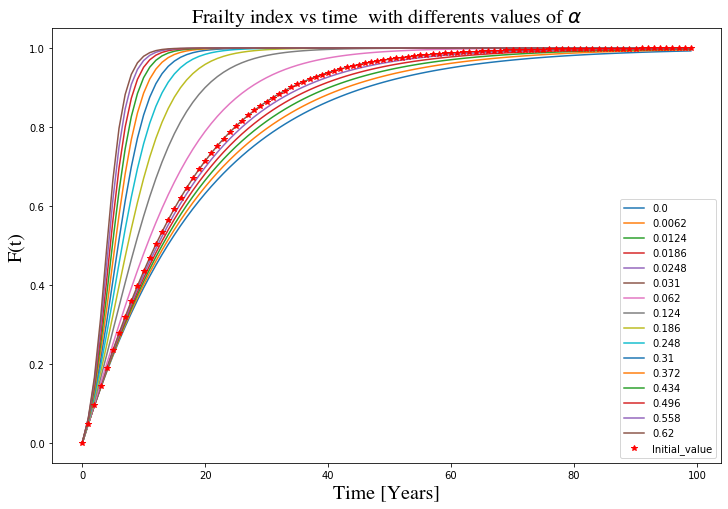

In [106]:
plt.figure(figsize=(12,8))
for i in range(len(rango_alphas)):
    plt.plot(temporal_points[i], x_points[i], label = f"{round(rango_alphas[i],4)}")
plt.plot(temporal_points[5], x_points[5], "*", color = "red", label = "Initial_value")
hfont = {'fontname':'Times'}
plt.title(r"Frailty index vs time  with differents values of $\alpha$", fontsize = 20, **hfont)
plt.xlabel("Time [Years]", fontsize = 20, **hfont)
plt.ylabel("F(t)", fontsize = 20, **hfont)
plt.legend()
plt.savefig("FI_alpha_modification.jpg", dpi = 500)
plt.show()

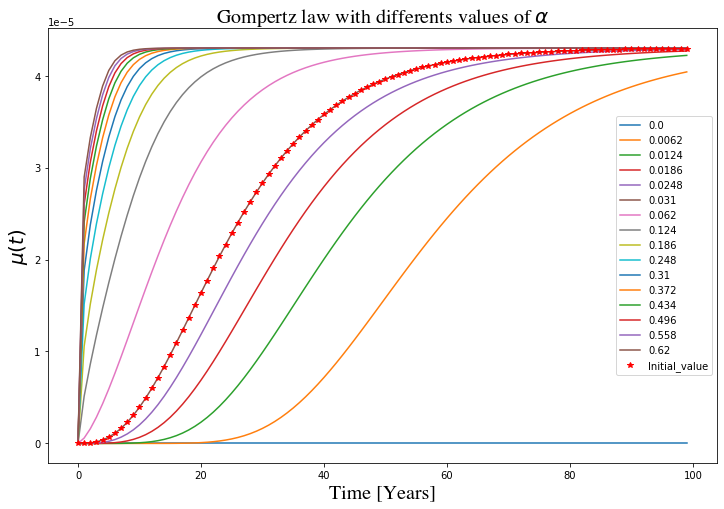

In [107]:

plt.figure(figsize=(12,8))
for i in range(len(rango_alphas)):
    plt.plot(temporal_points[i], gompertz_data[i], label = f"{round(rango_alphas[i],4)}")
plt.plot(temporal_points[5], gompertz_data[5], "*", color = "red", label = "Initial_value")
hfont = {'fontname':'Times'}
plt.title(r"Gompertz law with differents values of $\alpha$", fontsize = 20, **hfont)
plt.xlabel("Time [Years]", fontsize = 20, **hfont)
plt.ylabel(r"$\mu(t)$", fontsize = 20, **hfont)
plt.legend()
plt.savefig("GL_alpha_modification.jpg", dpi = 500)
plt.show()

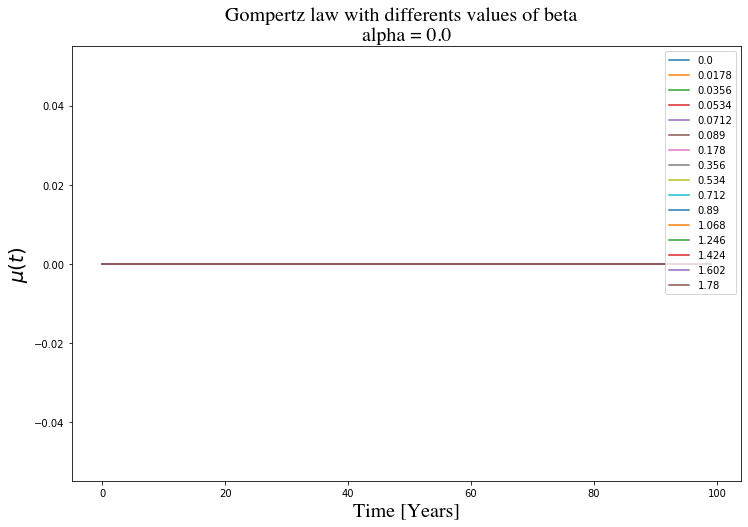

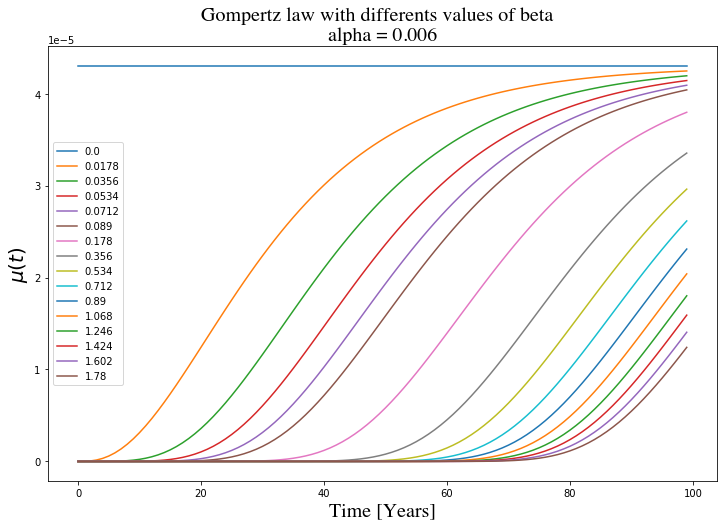

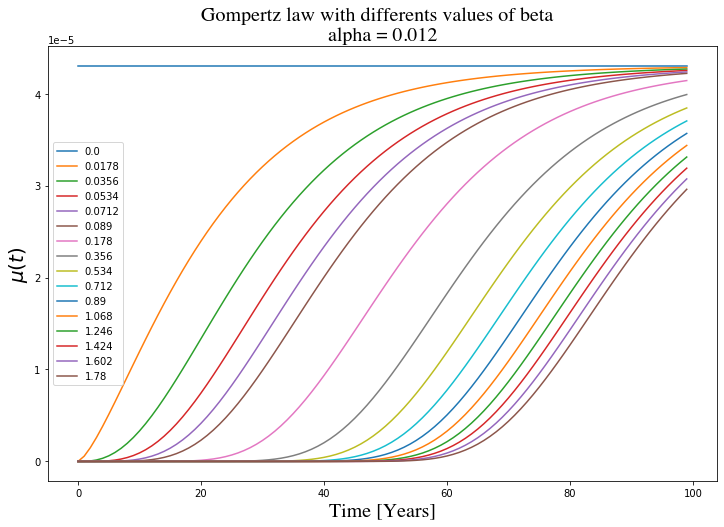

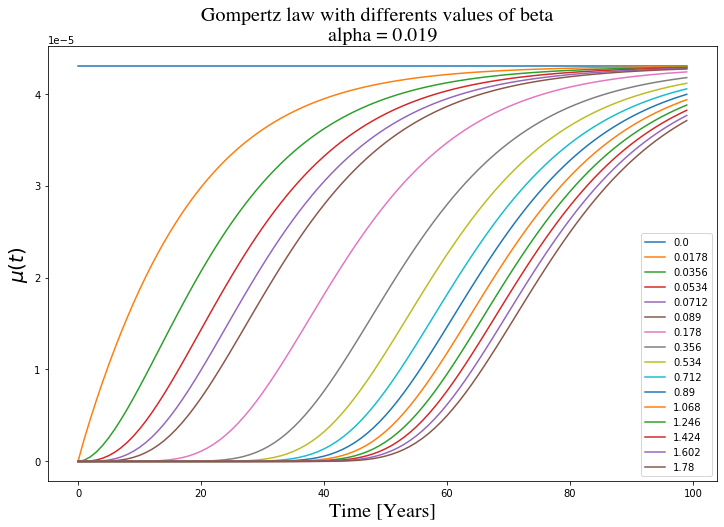

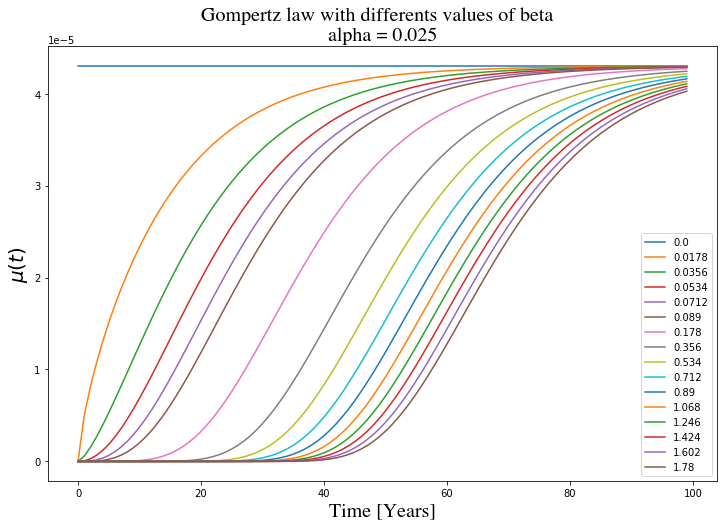

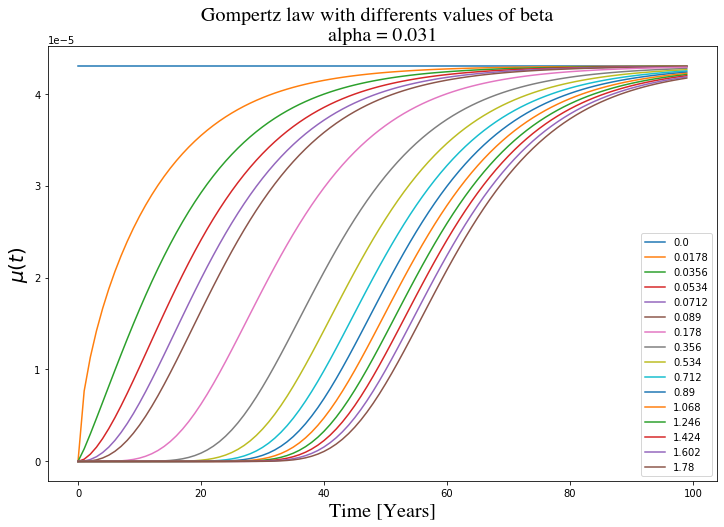

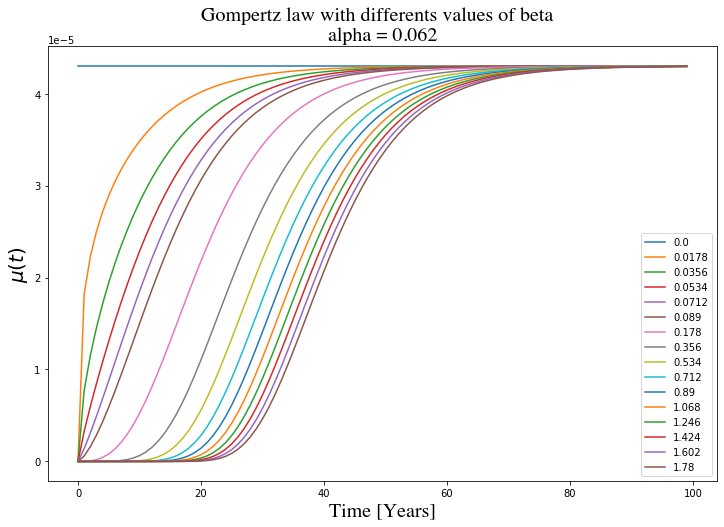

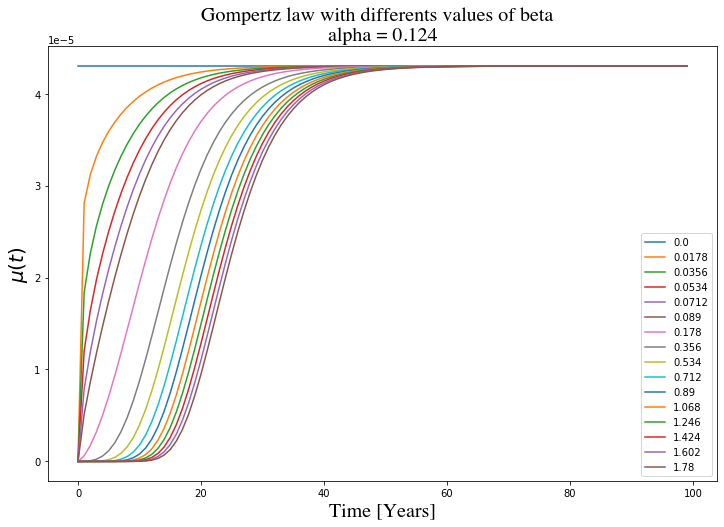

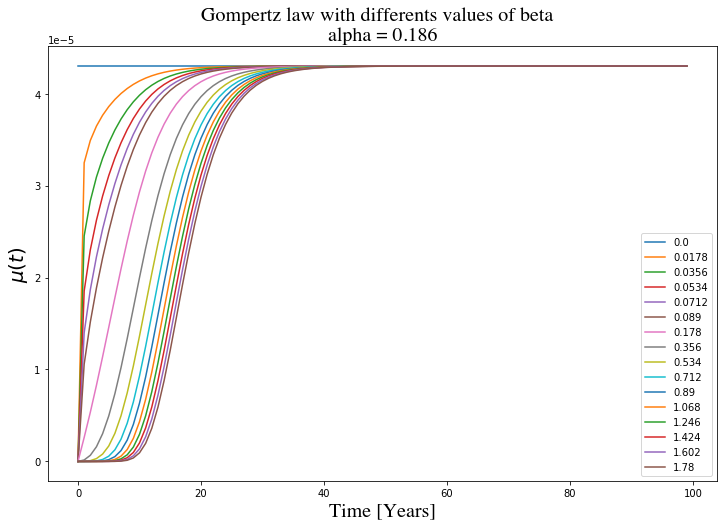

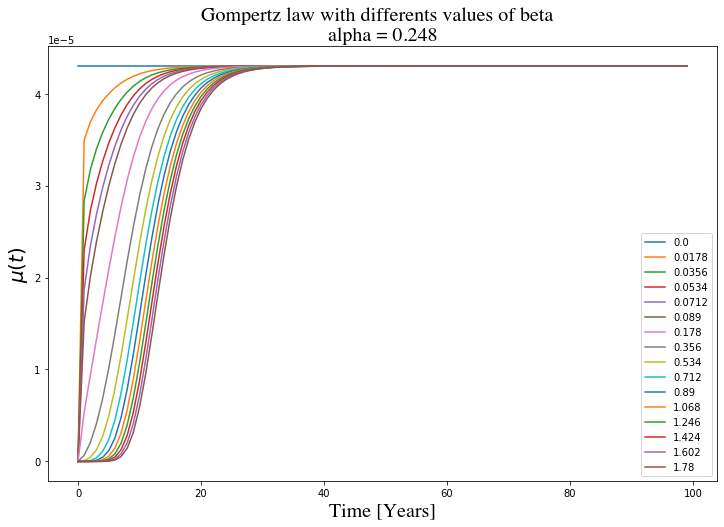

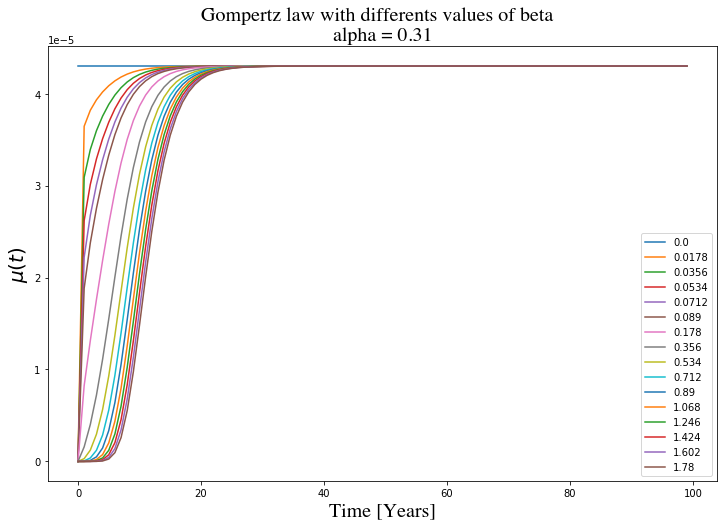

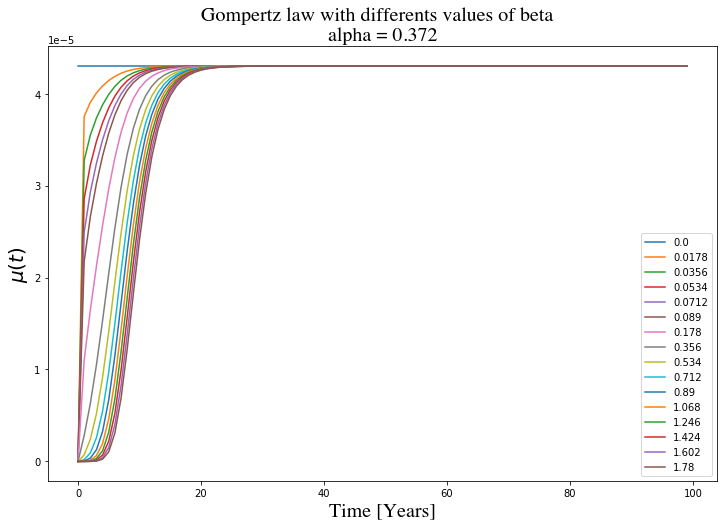

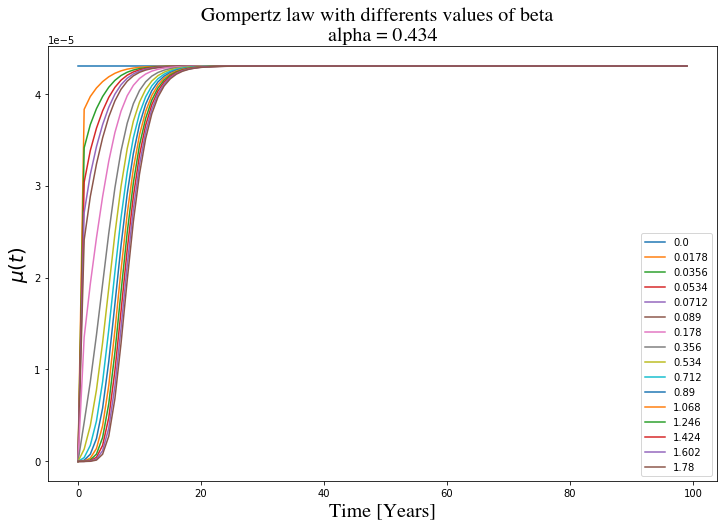

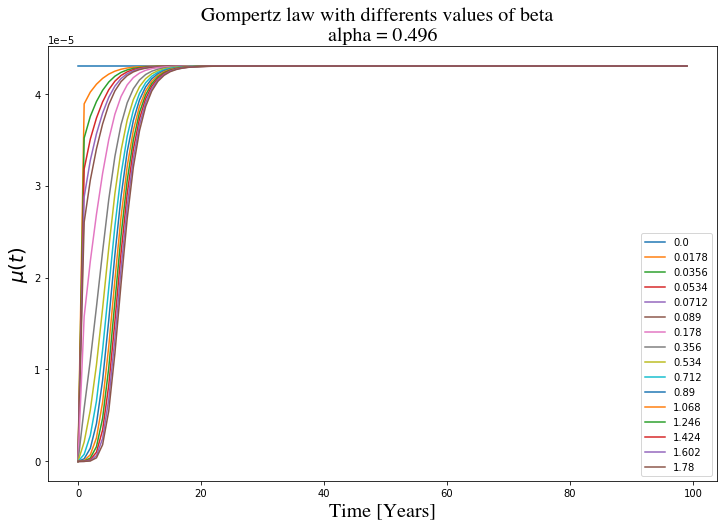

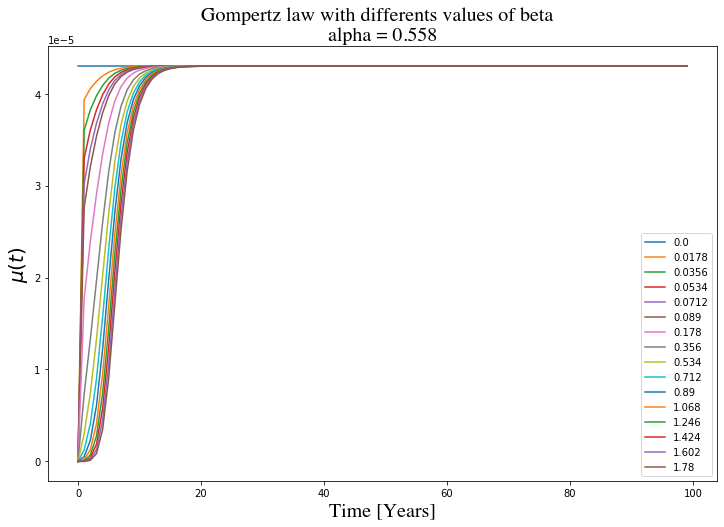

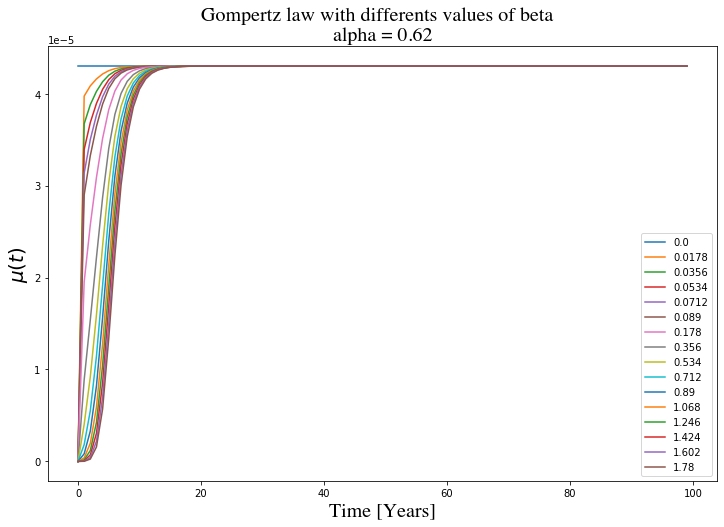

In [102]:
for i in range(len(rango_alphas)):
    plt.figure(figsize=(12,8))
    for j in range(len(General_gompertz_law["alpha:0.006200000000000001"])):
        plt.plot(temporal_points[j], General_gompertz_law[f"alpha:{rango_alphas[i]}"][j], label = f"{round(rango_betas[j],4)}")

#plt.plot(temporal_points[5], gompertz_data[5], "*", color = "red", label = "Initial_value")
    hfont = {'fontname':'Times'}
    plt.title(f"Gompertz law with differents values of beta  \n  alpha = {round(rango_alphas[i], 3)}  ", fontsize = 20, **hfont)
    plt.xlabel("Time [Years]", fontsize = 20, **hfont)
    plt.ylabel(r"$\mu(t)$", fontsize = 20, **hfont)
    plt.legend()
        #plt.savefig("GL_beta_modification.jpg", dpi = 500)
    plt.show()